In [68]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

In [173]:
x = np.concatenate((0.0 + 0.07*np.random.randn(64,1), 0.3 + 0.07*np.random.randn(64,1), 0.6 + 0.06*np.random.randn(64,1)))
y = np.concatenate((0.2 + 0.06*np.random.randn(64,1), 0.6 + 0.06*np.random.randn(64,1), 0.4 + 0.08*np.random.randn(64,1)))
X = np.concatenate((x,y), -1)
print(x.shape)

(192, 1)


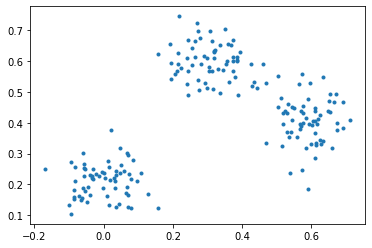

In [174]:
plt.plot(x,y,'.')
plt.show()

In [175]:
X = np.concatenate((x,y), -1)
print(X.shape)

(192, 2)


In [176]:
c = np.random.permutation(X.shape[0])[:3]
print(c)
print(X[c,:])
mu = X[c,:]

[101  99 181]
[[0.38902349 0.49079032]
 [0.33049007 0.57490542]
 [0.69069435 0.38155202]]


In [177]:
def distances(X,mu):
    return np.sqrt(np.expand_dims(np.sum(X**2,axis=1),1) - 2*np.matmul(X, mu.T) + np.expand_dims(np.sum(mu**2,1),0))

def classify(X,mu):
    dist = distances(X, mu)
    C = np.argmin(dist,1) # get pseudoclasses
    return C

def kmeans(X, K, iters=10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1) 
    # randomly choose 
    c = np.random.permutation(X.shape[0])[:K]
    mu = X[c, :]
    C = classify(X, mu)
    
    ax.cla()
    ax.scatter(X[:,0],X[:,1],marker='.', c=C)
    ax.scatter(mu[:,0],mu[:,1],marker='x', c='k')
        
    for i in range(iters):
        # plt.show()
        display(fig)    
        clear_output(wait = True)
        plt.pause(0.2)

        # dist = np.sqrt(np.expand_dims(np.sum(X**2,axis=1),1) - 2*np.matmul(X, mu.T) + np.expand_dims(np.sum(mu**2,1),0))
        # print(dist)
        # print(dist.shape)
        # C = np.argmin(dist,1) # get pseudoclasses'
        C = classify(X, mu)
        for k in range(K):
            mu[k, :] = np.mean(X[C==k,:], axis=0) # recompute centroids as means of pseudo classes
            
        # display
        ax.cla()
        ax.scatter(X[:,0],X[:,1],marker='.', c=C)
        ax.scatter(mu[:,0],mu[:,1],marker='x', c='k')
    
    return mu

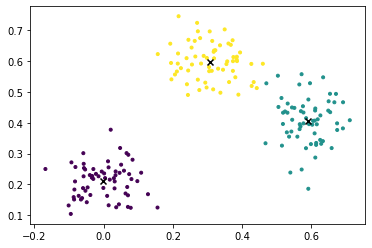

In [179]:
mu = kmeans(X,3, iters=50)

In [62]:
print(np.sum(X**2,axis=1).shape)
print(np.matmul(X,mu.T).shape)

(96,)
(96, 3)


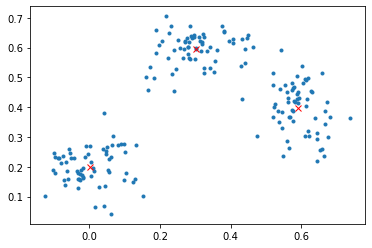

In [166]:
plt.plot(x,y,'.')
plt.plot(mu[:,0],mu[:,1],'xr')
plt.show()